# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: 
Forestry Parcel – Classification: https://www.stlouis-mo.gov/data/datasets/distribution.cfm?id=36 
Parcel and Owner Information: https://www.stlouis-mo.gov/data/datasets/distribution.cfm?id=83 (Note: Only one table from this database will be used – “Prcl”.  Additionally, this table can be shortened once other wards are removed. Also I was able to convert it into a CSV and remove the other wards.)
Information about Data Sets:
These data sets can be linked by parcel number, which is a unique identifier for each property in the area.
Additionally, here is there a library of meanings for the data sets: https://www.stlouis-mo.gov/data/vocabularies/index.cfm


Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

prcl = pd.read_csv("Prcl_7th_Ward.csv") #Note I pre-filtered the original database (in Access) to only be properties in the 7th Ward, since the file was too large with all the wards.
forestry = pd.read_csv("forestry-maintenance-properties.csv") #This dataframe has information on the properties that the city considers vacant and mows their lawns, I can connect it with the previous dataframe on PARCELID


C:\Users\LC Harrison Sand\AppData\Local\Temp\ipykernel_18604\3640422292.py:6: DtypeWarning: Columns (9,27,97,107,171) have mixed types. Specify dtype option on import or set low_memory=False.
  prcl = pd.read_csv("Prcl_7th_Ward.csv") #Note I pre-filtered the original database (in Access) to only be properties in the 7th Ward, since the file was too large with all the wards.


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [41]:
#I'm not going to combine the two datbases yet and look at them each. This is to help ensure that when I merge them that I am not missing information, and also to help me with nulls.

display(prcl.shape) #Using .shape to look at columns and rows of databases.
display(forestry.shape)
print(prcl.columns.to_list()) #There are many columns and I will need to drop many of them and only keep the ones that are useful. Note I had to add .to_list() to stop SC from truncating the results. 
display(forestry.columns) #I'm most likely going to be concerned with PARCELID and CATEGORY. PARCELID should match with AsrParcelId on the prcl dataframe.
display(prcl.isnull().sum()) #I will need to look at the columns I am most concerned with and see if they have nulls, and decide what to do.
display(forestry.isnull().sum())

#While this would normally be a data manipulation step, I am going to drop some of the columns to make this a little easier to visualize and work with. 
# Because there are so many columns to drop, I am going to specify which ones to keep rather than to drop, otherwise it would be a lot of work!
#I might get rid of more in DataManipulation steps.

prcl = prcl.loc[:, ['AsrParcelId','LowAddrNum' , 'HighAddrNum', 'StPreDir',	'StName',	'StType' , 'OwnerName',	'OwnerName2',	'OwnerAddr',	'OwnerCity' ,	'OwnerState',	'OwnerCountry',	'OwnerZIP' ,	'OwnerRank', 'IsAbatedProperty', 'VacantLot', 'LandArea', 'TaxBalDue', 'VacBldgYear', 'Ward20',	'Precinct20', 'ZIP', 'OwnerOcc']
] #This updates prcl to only include these columns.
# prcl.to_csv('prcl updated.csv', index=False) 
display(prcl.shape)
display(prcl.columns)
display(prcl.isnull().sum())


(8526, 187)

(26527, 4)

['CityBlock', 'Parcel', 'OwnerCode', 'AsrParcelId', 'ColParcelId', 'ColCityBlock', 'ColParcel', 'ParcelId', 'PrimAddrRecNum', 'AddrType', 'LowAddrNum', 'LowAddrSuf', 'HighAddrNum', 'HighAddrSuf', 'NLC', 'Parity', 'StPreDir', 'StName', 'StType', 'StSufDir', 'StdUnitNum', 'OwnerName', 'OwnerName2', 'OwnerAddr', 'OwnerCity', 'OwnerState', 'OwnerCountry', 'OwnerZIP', 'OwnerRank', 'LegalDesc1', 'LegalDesc2', 'LegalDesc3', 'LegalDesc4', 'LegalDesc5', 'AsrClassCode', 'PropertyClassCode', 'AsrLandUse1', 'AsrLanduse2', 'IsAbatedProperty', 'AbatementType', 'AbatementStartYear', 'AbatementEndYear', 'RedevPhase', 'RedevYearEnd', 'RedevPhase2', 'RedevYearEnd2', 'VacantLot', 'SpecBusDist', 'SpecBusDist2', 'SpecBusDist3', 'TIFDist', 'LendingAgcy', 'Condominium', 'NbrOfUnitsSource', 'NbrOfUnits', 'NbrOfApts', 'Frontage', 'LandArea', 'RecDailyDate', 'RecDailyNum', 'RecBookNum', 'RecPageNum', 'AsdLand', 'AsdImprove', 'AsdTotal', 'AsdResLand', 'AsdResImprove', 'AsdComLand', 'AsdComImprove', 'AsdAgrLand',

Index(['CATEGORY', 'HANDLE', 'PARCELID', 'PROPERTYADDRESS'], dtype='object')

CityBlock         0
Parcel            0
OwnerCode         0
AsrParcelId       0
ColParcelId       0
               ... 
Parcel9           0
OwnerOcc       4448
FirstDate         0
LastDate          0
OwnerUpdate     110
Length: 187, dtype: int64

CATEGORY            0
HANDLE              0
PARCELID            0
PROPERTYADDRESS    46
dtype: int64

(8526, 23)

Index(['AsrParcelId', 'LowAddrNum', 'HighAddrNum', 'StPreDir', 'StName',
       'StType', 'OwnerName', 'OwnerName2', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerCountry', 'OwnerZIP', 'OwnerRank',
       'IsAbatedProperty', 'VacantLot', 'LandArea', 'TaxBalDue', 'VacBldgYear',
       'Ward20', 'Precinct20', 'ZIP', 'OwnerOcc'],
      dtype='object')

AsrParcelId            0
LowAddrNum             0
HighAddrNum            0
StPreDir            7963
StName                 0
StType                 0
OwnerName              0
OwnerName2          7427
OwnerAddr            118
OwnerCity            119
OwnerState           236
OwnerCountry        3636
OwnerZIP             119
OwnerRank           7510
IsAbatedProperty       0
VacantLot              0
LandArea               0
TaxBalDue              0
VacBldgYear            0
Ward20                 0
Precinct20             0
ZIP                    0
OwnerOcc            4448
dtype: int64

"\nprcl['VacBldgYear'].replace(0, pd.NA, inplace=True) #This replaces 0 with null values, since that is what the 0 is trying to represent and there were many zeroes.\ndisplay(prcl['VacBldgYear'].isnull().sum())\ndisplay(prcl['VacBldgYear'].min())\nyear_groups = '[1980-1989', '1990-1999', '2000-2009', '2010-2019', '2020-2024']\nfor year in range[1989, 2025]:\n        if year in [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989]:\n            prcl['yeargroup'] = '1980-1989'\n        if year in [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]:\n            prcl['yeargroup'] = '1990-1999'\n         if year in [2000, 2001, 2002, 1983, 1984, 1985, 1986, 1987, 1988, 1989]:\n            prcl['yeargroup'] = '2000-2009'\n\nfor year_group in year_groups:\n\n# vacant_buildings = prcl[prcl['VacantLot']== True & prcl[]]\n"

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

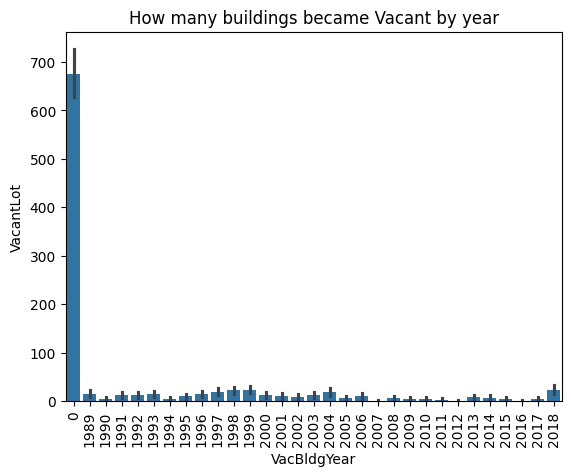

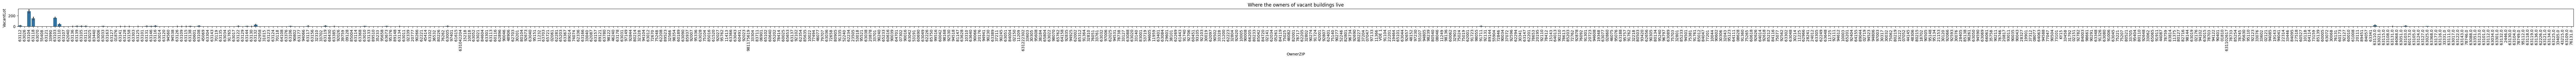

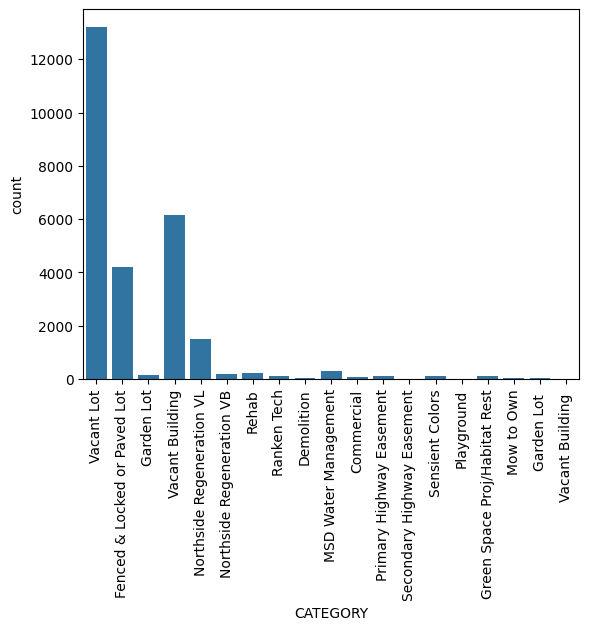

In [56]:
'''
I'm going to use seaborn, since it is normally easier.
Additionally, I will not need to do many visualizations, since much of my data is qualitative rather than quantitative and the visulizations will help less
at this step, but can be useful later in the process.

Plots to get a general idea of data:
vacant building sum of True vs zip codes of owners
vacant buildings sum of True by years that they became vacant
My guess is these will be hard to read due to the amount of data, but it might give me ideas of some manipulation I might need to do/
'''
sns.barplot(x='VacBldgYear', y="VacantLot", data=prcl, estimator='sum').set(title="How many buildings became Vacant by year")
plot.xticks(rotation=90)
plot.show()
plot.figure(figsize=(120, 8)) #I had to change the figure size to see all of the data, I will do something about this for Data Manipulation stage.
sns.barplot(x='OwnerZIP', y="VacantLot", data=prcl, estimator='sum').set(title="Where the owners of vacant buildings live")
plot.subplots_adjust(bottom=0.8)
plot.xticks(rotation=90)
plot.show()
sns.countplot(x='CATEGORY', data=forestry)
plot.xticks(rotation=90)
plot.show()




## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
I think the number of Zipcodes that owners represent, I might have to see if there is a library that works with geographic data well. 
2. Do you have any concerns about your dataset? 
No huge concerns, I will have to make sure I know the meanings of the different categories in Forestry DataFrame and will need to see if Vacant Lot and Forestry match.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
The issue in #1 and I will have to make 0 into null for the year of vacant lots - I will need to see if they are vacant or just what is listed if they are not vacant. I will also have to double check which columns I actually need. Additionally, some ZIP codes appear to be 5 + 4.